#DS 203 - Programming for Data Science
##Assigment 4





In this first cell I have imported all the required libraries and also read the data given.<br>
Then cleaned the data and added the percentages columns to the data

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import statistics as stats

dataset = pd.read_csv('NDAP_REPORT_7004.csv')

for item in dataset.columns: #loop through all the columns of dataset
   dataset[item] =  dataset[item].replace('zero' , 0) #used the replace function for replacing all the 'zero' to 0
dataset = dataset.fillna(0) #filled all missing values with nan
dataset[['Number of census houses', "Houses having grass or thatch or bamboo etc. as material of wall", "Houses having plastic or polythene as material of wall"]] = dataset[['Number of census houses', "Houses having grass or thatch or bamboo etc. as material of wall", "Houses having plastic or polythene as material of wall"]].apply(pd.to_numeric) #to convert the columns having object type to float64
# dataset = dataset.fillna(np.nan)
# dataset = dataset.fillna(0) #filled all na valued with 0
for item in dataset.columns:
   if (dataset[item].dtypes == 'float64'): #checking whether a column is of type 'float64'
      dataset[item] = dataset[item].astype(int) # if true convert the column to 'int64
for i in range(9, 19): #loop from column J to S
    dataset['Percentage of '+dataset.columns[i]] = (dataset.iloc[:, i]/dataset.iloc[:, 8])*100 #used iloc function to get data from columns and divided by data from column I
dataset

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,...,Percentage of Houses having grass or thatch or bamboo etc. as material of wall,Percentage of Houses having plastic or polythene as material of wall,Percentage of Houses having mud or unburnt brick as material of wall,Percentage of Houses having wood as material of wall,Percentage of Houses having stone not packed with mortar as material of wall,Percentage of Houses having stone packed with mortar as material of wall,Percentage of Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Percentage of Houses having burnt brick as material of wall,Percentage of Houses having concrete as material of wall,Percentage of Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,...,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,...,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561,134,...,0.156613,0.196351,8.384661,1.122007,0.874230,0.357640,0.250114,85.718961,1.183951,1.750798
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,...,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312,410,...,0.340781,0.143793,15.964326,2.682193,10.432875,4.553993,1.446240,60.414589,1.760423,2.256633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,...,0.476955,0.354175,1.005856,0.224311,0.170004,0.436815,0.306951,92.463166,4.549962,0.011806
1469,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,...,0.110906,0.000000,0.924214,0.036969,4.399261,94.158965,0.000000,0.036969,0.092421,0.240296
1470,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,...,0.208373,0.018943,0.113658,0.000000,3.125592,91.305171,0.208373,2.784618,2.197386,0.037886
1471,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,...,46.396295,0.175102,13.948825,0.409512,0.319137,0.208992,0.271125,35.703796,2.533326,0.033891


In this cell I imported scipy library using which I mentioned the distribution for the qq plot. <br>
'norm' is for gaussian distribution and 'unifor' for uniform <br>
On seeing the qq plots neither of them seem to be close to the 45 degree line, so both normal and gaussian distributions are not fit for our data

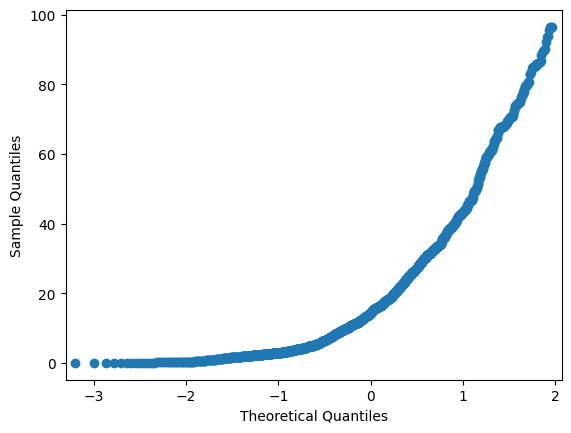

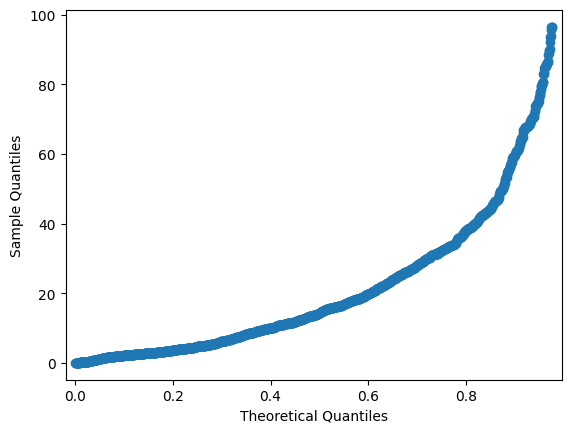

In [119]:
import scipy
sm.qqplot(dataset['Percentage of Houses having mud or unburnt brick as material of wall'], dist = scipy.stats.distributions.norm) #using qqplot function and specifying distribution using scipy library
plt.show() #so that graph does not get repeated
sm.qqplot(dataset['Percentage of Houses having mud or unburnt brick as material of wall'], dist = scipy.stats.distributions.uniform())  #using qqplot function and specifying distribution using scipy library
plt.show() 




Here I used the log likelihood function for both gaussian and uniform distribution and calculated the log likelihood for both.<br>
As we saw from the qq plot, similar results we get from here as well, both of the distributions yield similar likelihood but uniform is a little bit better
​


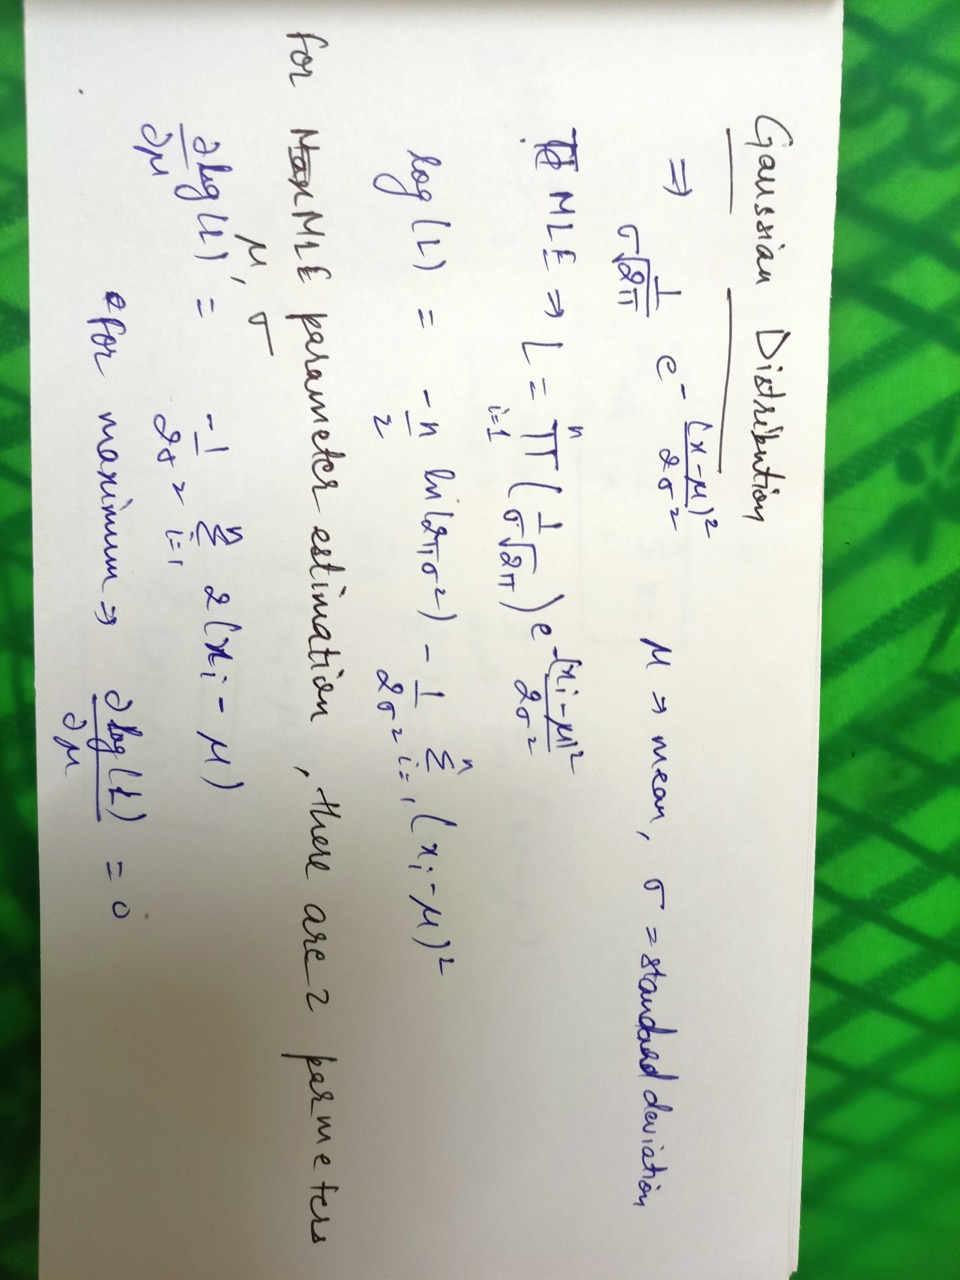

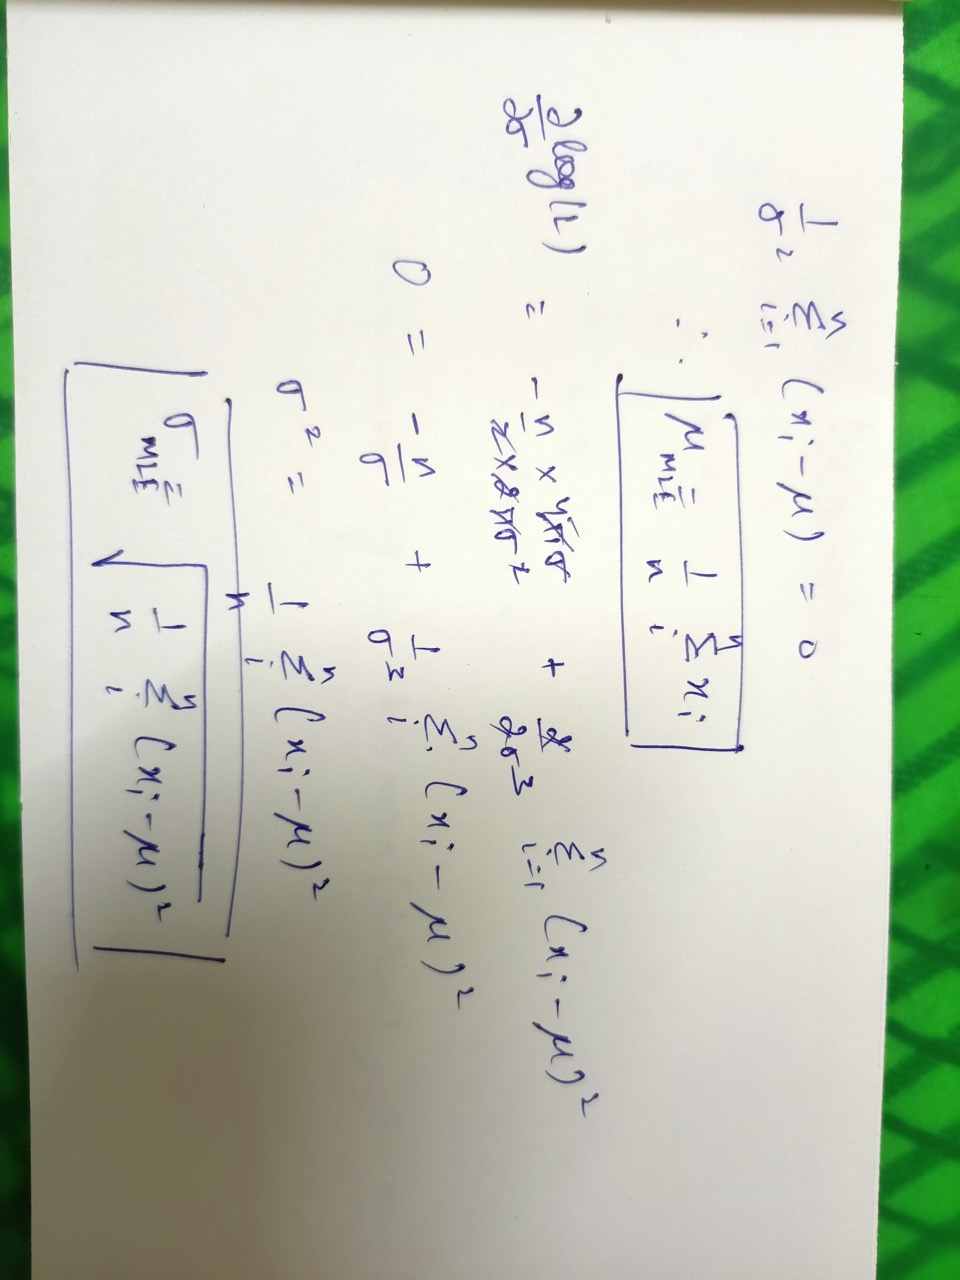

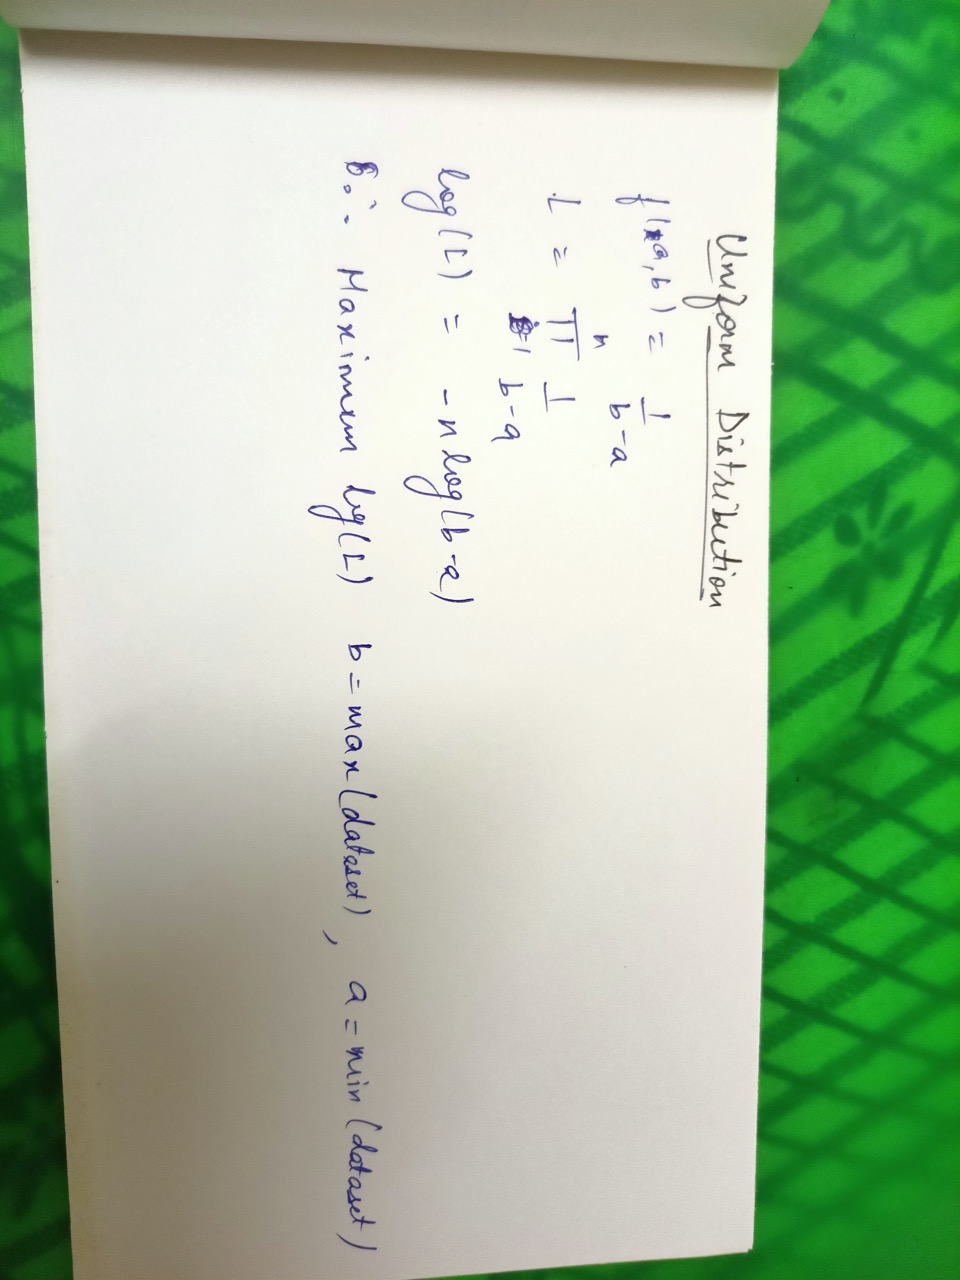

In [120]:
import math
# Calculating log likelihood for uniform distribution
data = dataset['Percentage of Houses having mud or unburnt brick as material of wall'].sort_values()
b = data.max() #value got by mle parameter estimation
a = data.min() #value got by mle parameter estimation
uniformLikelihood = -len(data)*math.log(b-a) #formula in the photos above

#Calculating log likelihood for gaussian distribution
m = dataset.iloc[:, 21].mean() #value got by mle parameter estimation
std = dataset.iloc[:, 21].std() #value got by mle parameter estimation
gaussianLikelihood = -(len(data))*math.log(math.pi*2*(std)**2)/2 - len(data)/2 #formula in the above photos

print(uniformLikelihood, gaussianLikelihood)




-6730.340922806081 -6574.381452529583


For this question we were given a triangular function to be used as reference for the qq plot. In the scipy library there was a distribution named 'triang', I used the same to get gived qq plot. <br>The distribution seems to close to 45 degree line which means it almost satifies the data 

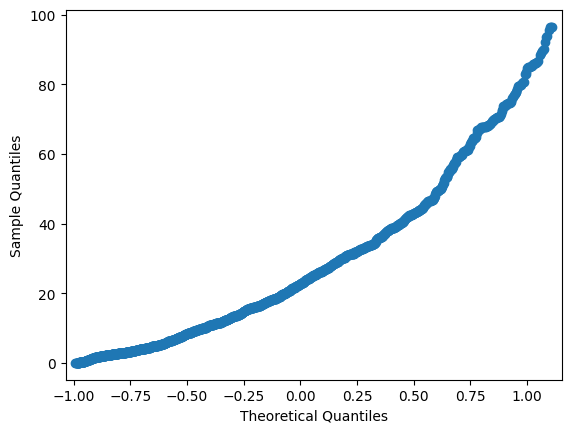

In [121]:
import statsmodels as stm
stm.graphics.gofplots.qqplot(dataset['Percentage of Houses having mud or unburnt brick as material of wall'], dist=scipy.stats.distributions.triang(0.01, loc=-1, scale=2.5)) #loc decides the position of the triangle, scale decides the scale
plt.show() #to avoid multiple graphs



In the question 3a first I filtered data with respect to rural and urban.<br>
Then calculated the avearage percentages for both rural and urban sets.<br>
The percentage of rural is greater which means that Houses having mud or unburnt brick as material of wall are more prominent than in urban areas.

In [122]:
filterRural = dataset['Type of residence namely rural or urban'] == 'Rural' #filter for rural areas in districts 
filterUrban = dataset['Type of residence namely rural or urban'] == 'Urban' #filter for urban areas in districts
rural = dataset[filterRural]
urban = dataset[filterUrban]
print(np.sum(rural['Percentage of Houses having mud or unburnt brick as material of wall'])/len(rural)) #calculating and printing avearge percentage in rural areas
print(np.sum(urban['Percentage of Houses having mud or unburnt brick as material of wall'])/len(dataset[filterUrban])) #calculating and printing avearge percentage in urban areas

28.076307155084855
12.83964749131252


#3b
To check whether we can predict the data using other housing data we need the correlation matrix.<br>
In the matrix we can see can for the Percentage of Houses having mud or unburnt brick as material of wall all the other house data have either negative or very less relation thus we cannot predict data from them.

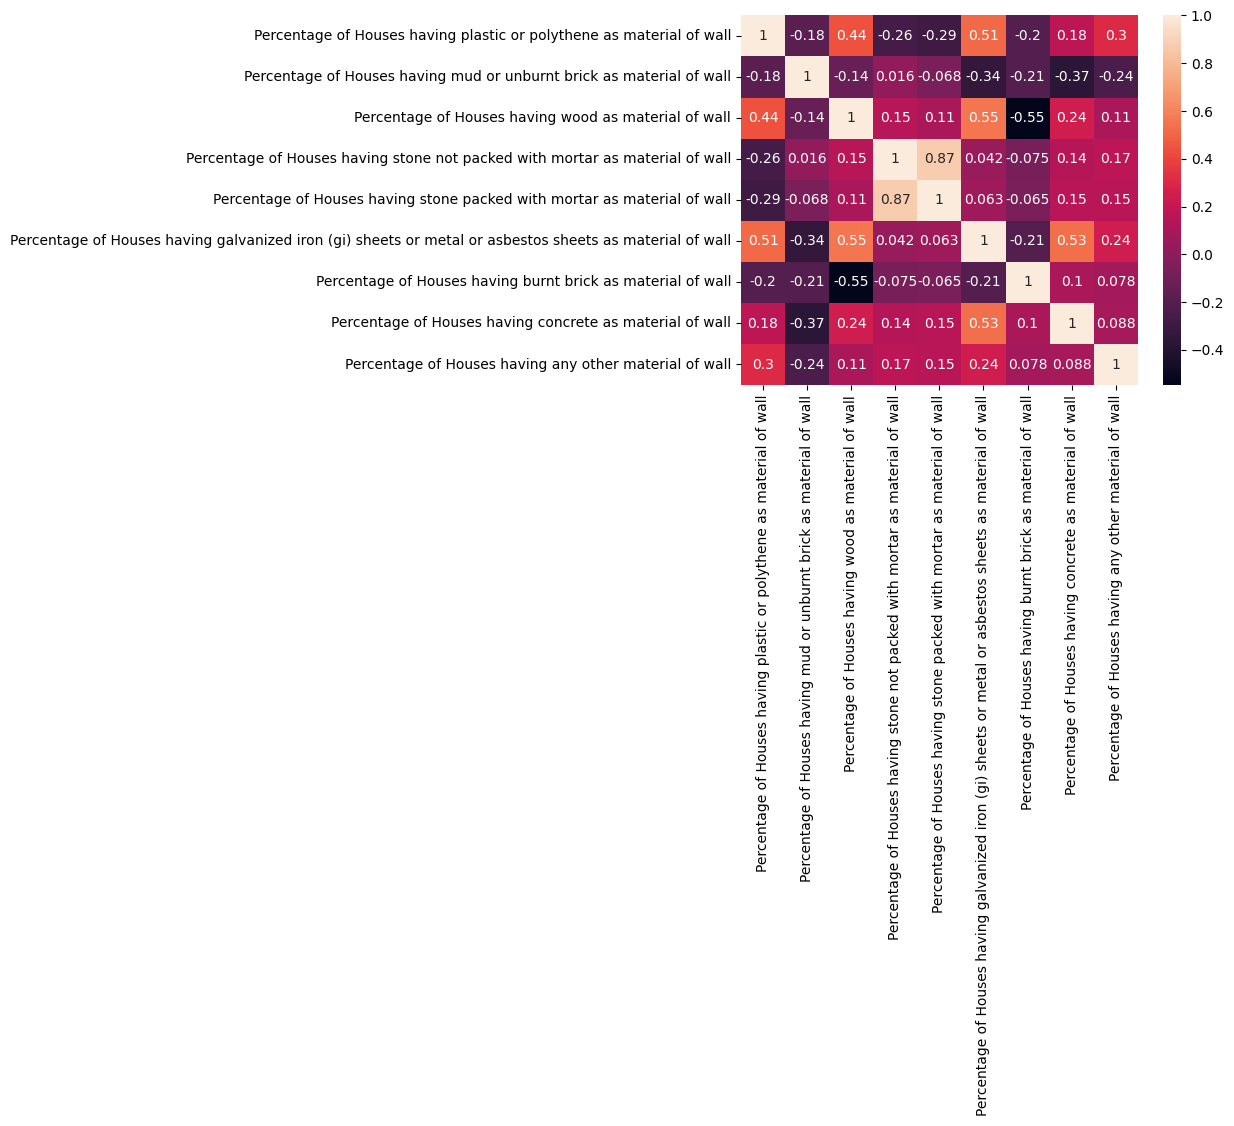

In [123]:
corrMatrix = dataset.iloc[:, 20: ].corr(method='spearman') # used iloc to get the dataset of new columns and method used for correlation is spearman
sb.heatmap(corrMatrix, annot=True) # used heatmap function to plot the correlation matrix and enabled the annotation
plt.show()

Reading the automobile data and storing in a variable



In [124]:
df = pd.read_csv('Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


For the question I used the chi-squared method to check if there is a relation between the two datas<br>
For the same I used the unique values of the mentioned datas and made a table of the observed data.

In [125]:
filtersBody = [] #list to store filters on body-style
filtersDrive = [] #list to store filters on drive-wheels
for i in df['body-style'].unique(): #loop to store filters on body-style
    filtersBody.append(df['body-style'] == i)
for i in df['drive-wheels'].unique(): #loop to store filters on drive-wheels
    filtersDrive.append(df['drive-wheels'] == i)



observedData = {'Body Styles': df['body-style'].unique()} #dictionary to make a new Dataframe of observed data

for i in range (3):
    observedData[df['drive-wheels'].unique()[i]] = [] #to make columns of different drive wheels type
    for j in range(5):
        observedData[df['drive-wheels'].unique()[i]].append(len(df[filtersBody[j]][filtersDrive[i]])) #appended each column by using different filters created before


df1 = pd.DataFrame(observedData) #made a dataframe using the dictionary
df1



/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_46287/2616566665.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  observedData[df['drive-wheels'].unique()[i]].append(len(df[filtersBody[j]][filtersDrive[i]])) #appended each column by using different filters created before


,Body Styles,rwd,fwd,4wd
0,convertible,5,1,0
1,hatchback,19,49,2
2,sedan,36,57,3
3,wagon,9,12,4
4,hardtop,7,1,0


In this code cell I used the observed data to make a dataframe of the expected data. 

In [126]:
expectedData = {'Body Styles': df['body-style'].unique()} #initialized a dictionary with first column containing names of different body styles
sumColumn = np.sum(df1.iloc[:, 1:], axis=0) #calculated an array containing sums of various columns using the np sum method 
sumRow = np.sum(df1.iloc[:, 1:], axis=1) #calculated an array containing sums of various rows using the np sum method 
sum = np.sum(sumRow) #calculated the sum of all the no.s in the whole dataset

for i in range(3):
    expectedData[df['drive-wheels'].unique()[i]] = [] #intialised the keys with the names of different drive types
    for j in range(5):
        expectedData[df['drive-wheels'].unique()[i]].append(sumColumn[i]*sumRow[j]/sum) #used the formula to calculated entries in expected dataset

df2 = pd.DataFrame(expectedData) #made a dataframe from the made dictionary
df2


,Body Styles,rwd,fwd,4wd
0,convertible,2.224390,3.512195,0.263415
1,hatchback,25.951220,40.975610,3.073171
2,sedan,35.590244,56.195122,4.214634
3,wagon,9.268293,14.634146,1.097561
4,hardtop,2.965854,4.682927,0.351220


In this cell I calculated the value to judge whether the given datas are related or not.<br>
Since there are 3 columns and 5 rows, degree of freedom = (3-1)*(5-1) = 8
For 8 degree value should be greater than 26.125 and our value comes out to be 26.59 so it is related.

In [127]:
value = 0

for i in range(3):
    for j in range(5):
        value += (df1.iloc[:, i+1][j] - df2.iloc[:, i+1][j])**2/df2.iloc[:, i+1][j] #Calculated the value using the formula of chi-squared method
value

26.59036353905597

References:
itl.nist.gov/div898/handbook/eda/section3/eda3674.htm(Refernce for critical values for different values on chi sqared method)
https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f#:~:text=MLE%20tells%20us%20which%20curve,are%20our%20parameters%20of%20interest.(MLE parameter estimation for gaussian distribution)
https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/(qq plot)
https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html(qq plot)
https://docs.scipy.org/doc/scipy/reference/stats.html(qq plot for different distributions)
google.com(for general error handling)
stackoverflow.com(for error handling)
210020120 Saumya Bhavesh Seth